In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from copy import deepcopy
from tqdm import tqdm_notebook as tqdm

from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

Populating the interactive namespace from numpy and matplotlib


/home/jakob/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
# define scenarios and load data
scenarios = {1: {'r_trade': 6000,
                 'd_start': 400},
             2: {'r_trade': 6000,
                 'd_start': 550},
             3: {'r_trade': 8000,
                 'd_start': 400}
            }

final_states = pd.read_pickle('/home/jakob/Project_MayaSim/output_data/X9_stability_analysis/results/all_final_states')
final_states.head()

key                                                                   final states
d_length d_severity r_trade d_start timesteps observables                         
0        0          6000    400     0         final max cluster size          45.0
                                              final population           1235338.0
                                              final trade links              140.0
                                              final_cleared_cells          14845.0
                                              final_climax_cells           47379.0

Caption: Average population after recovery period resulting from a drought event of given length and decrease in precipitation.

In [3]:
# define plot function and plot parameters
pylab.rcParams['figure.figsize'] = (18, 6)

def plt_heatmap(ax, obs, measure, min_data, scn, clabel=None, ylabels=None, tlabels=None):
    """plot heatmaps from experiment data and draw elipse"""
    if measure == 'max':
        min_data = final_states.groupby(level=[0, 1, 2, 3, 5]).max().unstack('d_length')
    elif measure == 'min':
        min_data = final_states.groupby(level=[0, 1, 2, 3, 5]).min().unstack('d_length')
    elif measure == 'mean':
        min_data = final_states.groupby(level=[0, 1, 2, 3, 5]).min().unstack('d_length')
    else:
        raise ValueError(f'measure {measure} is not implemented')
    min_data.columns = min_data.columns.droplevel()

    cmap = sns.cubehelix_palette(start=2.8, rot=.1, reverse=True, as_cmap=True)
    
    mi = min_data.xs(level=[*scn.keys(), 'observables'], key=[*scn.values(), obs]).astype('int').min().min()
    ma = min_data.xs(level=[*scn.keys(), 'observables'], key=[*scn.values(), obs]).astype('int').max().max()
    
    cax = sns.heatmap(min_data.xs(level=[*scn.keys(), 'observables'], key=[*scn.values(), obs]).astype('int'), 
                fmt="d", 
                ax=ax,
                cmap=cmap,
                #cbar=False,
                cbar_kws=dict(label=clabel,use_gridspec=False, location='top')
               )
    cax.collections[0].colorbar.set_ticks([mi, (mi+ma)/2., ma])
    
    if tlabels is not None:
        cax.collections[0].colorbar.set_ticklabels(tlabels)
    
    ax.invert_yaxis()
    
    ax.set_xlabel('length of drought in years')
    if ylabels is not None:
        if not ylabels:
            plt.setp(ax.get_yticklabels(), visible=False)
            ax.yaxis.set_tick_params(size=0)
            ax.set_ylabel('')
        else:
            ax.set_ylabel('decrease in precipitation')
        
    ellipse = mpl.patches.Ellipse(xy = (5, 9), width=4, height=7, color='r', alpha=0.4)
    ax.add_artist(ellipse)

clabels = ('max of number of final climax forest cells',
           'min of final size of biggest trade cluster',
           'min of final total population'
          )
measures = ('max',
           'min',
           'min')
ylabels = (True,
           False,
           False)
observables = ('final_climax_cells',
               'final max cluster size',
               'final population'
              )
tick_labels = {1: (['46K', '64K', '81K'],
                   ['0', '53', '107'],
                   ['0', '1M', '2M']
                  ),
               2: (['51K', '66K', '81K'],
                   ['0', '28', '57'],
                   ['0', '727K', '1.4M']
                  ),
               3: (['8K', '45K', '81K'],
                   ['0', '271', '542'],
                   ['0', '4M', '8M']
                  )
              }

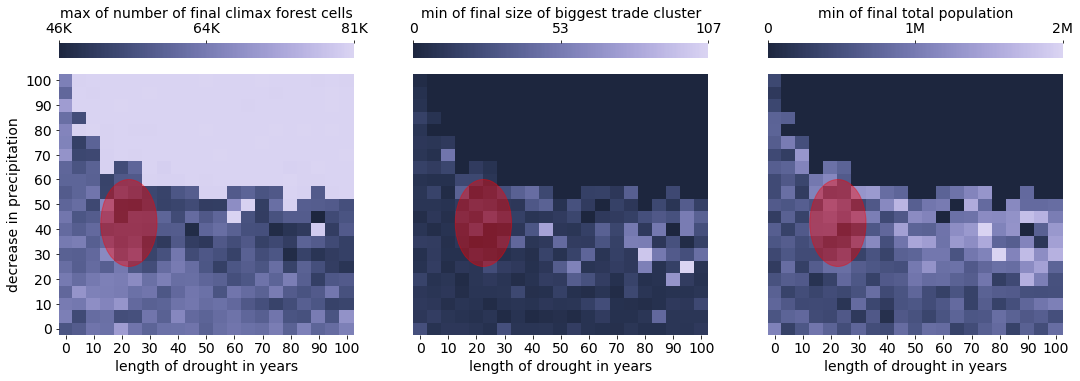

In [4]:
# Plot scenario 1: Low trade income from drought and drought hitting at bottom of cycle
mpl.rcParams.update({'font.size': 14})

scn_number = 1

fig, axes = plt.subplots(nrows=1, ncols=3)            
for ax, clabel, observable, measure, ylabel, tlabel in zip(axes, clabels, observables, measures, ylabels, tick_labels[scn_number]):
    plt_heatmap(ax=ax,
                obs=observable,
                measure=measure,
                ylabels=ylabel,
                tlabels=tlabel,
                scn=scenarios[scn_number],
                clabel=clabel,
                min_data=final_states)

fig.savefig(f'stability_analysis_plot_{scn_number}.pdf', transparent=True)

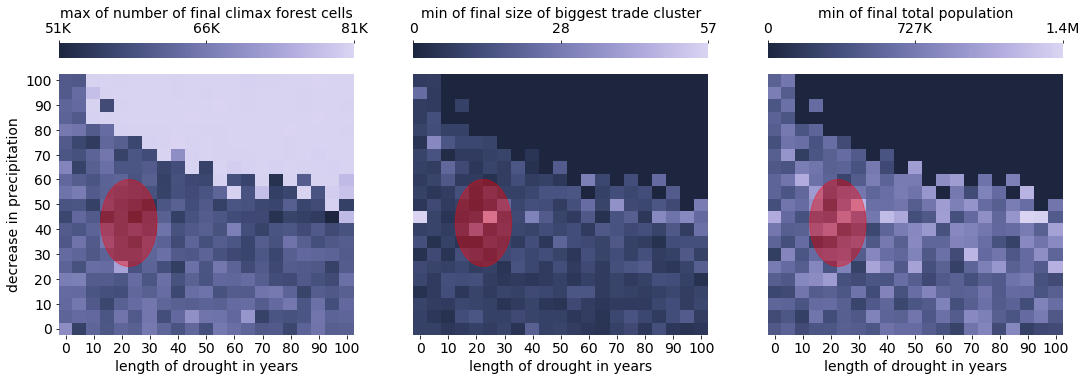

In [5]:
# Plot scenario 2: Low income from trade and drought hitting at top of cycle
mpl.rcParams.update({'font.size': 14})

scn_number = 2

fig, axes = plt.subplots(nrows=1, ncols=3)            
for ax, clabel, observable, measure, ylabel, tlabel in zip(axes, clabels, observables, measures, ylabels, tick_labels[scn_number]):
    plt_heatmap(ax=ax,
                obs=observable,
                measure=measure,
                ylabels=ylabel,
                tlabels=tlabel,
                scn=scenarios[scn_number],
                clabel=clabel,
                min_data=final_states)

fig.savefig(f'stability_analysis_plot_{scn_number}.pdf', transparent=True)

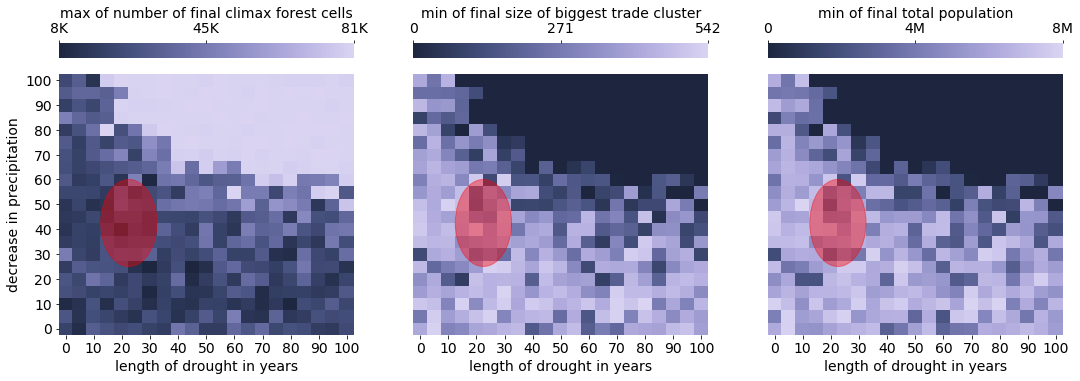

In [6]:
# Plot scenario 3
mpl.rcParams.update({'font.size': 14})

scn_number = 3

fig, axes = plt.subplots(nrows=1, ncols=3)            
for ax, clabel, observable, measure, ylabel, tlabel in zip(axes, clabels, observables, measures, ylabels, tick_labels[scn_number]):
    plt_heatmap(ax=ax,
                obs=observable,
                measure=measure,
                ylabels=ylabel,
                tlabels=tlabel,
                scn=scenarios[scn_number],
                clabel=clabel,
                min_data=final_states)

fig.savefig(f'stability_analysis_plot_{scn_number}.pdf', transparent=True)

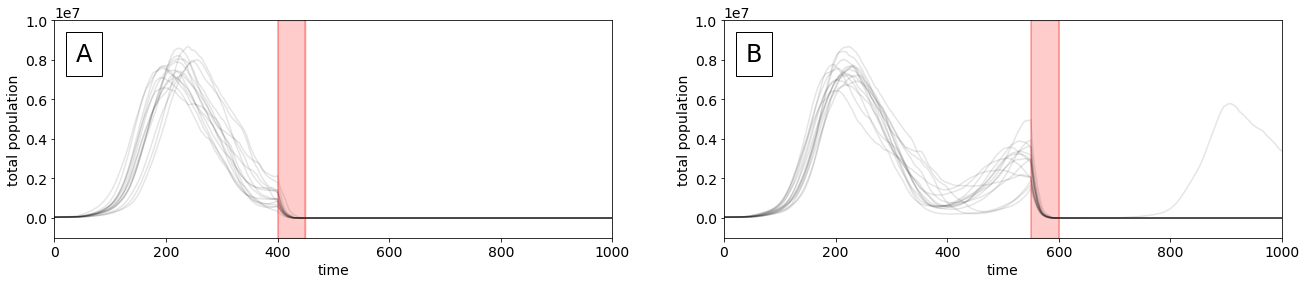

In [14]:
# plot trajectories for different beginning of drought
d_severity = 90
d_length = 50
d_starts = [400, 550]
annotations = ['A', 'B']

def add_at(ax, t, loc=2):
    fp = dict(size=24)
    _at = AnchoredText(t, loc=loc, prop=fp, )
    ax.add_artist(_at)
    return _at

pylab.rcParams['figure.figsize'] = (22, 4)

obs = ['mean_soil_degradation', 'forest_state_3_cells', 'total_population'][2]

fig, ax = plt.subplots(ncols=2)

for d_start, ax, ann in zip(d_starts, ax, annotations):
    with pd.HDFStore('/home/jakob/Project_MayaSim/output_data/X9_stability_analysis/results/all_trajectories.df5') as store:
        df = store.select('d1', where=f'd_severity={d_severity} & d_length = {d_length} & r_trade=6000 & d_start={d_start}', columns=[obs])
        dft = df
    dft.index = df.index.droplevel(['r_trade', 'd_severity'])

    ax.set_xlabel('time')
    ax.set_ylabel('total population')

    # plot trajectories
    dft.unstack(['d_length', 'run_id', 'd_start']).plot(legend=False, alpha=0.1, color='black', ax=ax)

    # mark drought area
    ax.fill_betweenx(np.arange(-int(.1e7), int(1.e7),10), d_start, d_start+d_length, color='r', alpha=.2)
    ax.axvline(d_start, color='r', alpha=.3)
    ax.axvline(d_start+d_length, color='r', alpha=.3)

    # adjust axis limits
    ax.set_xlim([0,1000])
    ax.set_ylim([-int(.1e7), int(1.e7)])
    at = add_at(ax, ann)

fig.savefig(f'population_with_drought.pdf')
fig.savefig(f'population for d_length = {d_length}, d_severity = {d_severity}, d_start = {d_start}.png')

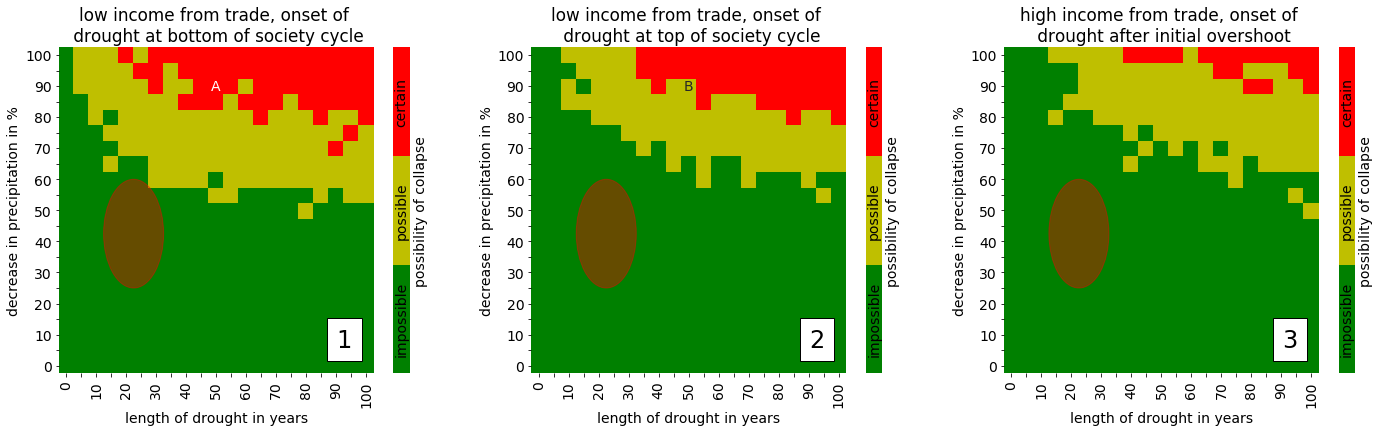

In [13]:
# plot colormap of possibility for collapse

df_fp = final_states.xs(level=('observables'), key=('final population')).unstack('timesteps')
df_class = pd.DataFrame(index=df_fp.index, columns=['class'])
for i, df_data in df_fp.iterrows():
    val = df_data.values
    if all(val == 0):
        cls = 2
    elif all(val != 0):
        cls = 0
    else:
        cls = 1
    df_class.loc[i] = cls

# use d_length as column index and drop other, redundand column index level
min_data = df_class.unstack('d_length')
min_data.columns = min_data.columns.droplevel()

pylab.rcParams['figure.figsize'] = (24, 6)

# generate figure and axes for three horizontally aranged plots
fig, axes = plt.subplots(ncols=3)

# generate color palette for three values with three colors
cmap = sns.color_palette(palette=['g', 'y', 'r'], n_colors=3)

titles = {1: 'low income from trade, onset of \n drought at bottom of society cycle',
          2: 'low income from trade, onset of \n drought at top of society cycle',
          3: 'high income from trade, onset of \n drought after initial overshoot'}

# iterate over axes and scenario indices
for ax, sc, no in zip(axes, [1,2,3], ['1', '2', '3']):
    
    df_class['ann'] = ''
    if sc == 1:
        df_class.loc[(d_severity, d_length), 'ann'] = 'A'
    elif sc == 2:
        df_class.loc[(d_severity, d_length), 'ann'] = 'B'
    
    ann = df_class[['ann']].astype(str)
    ann = ann.unstack('d_severity')
    ann.columns = ann.columns.droplevel()
    
    # plot heatmap with color bar
    sns.heatmap(min_data.xs(level=[*scenarios[sc].keys()], key=[*scenarios[sc].values()]).astype('int'), 
                fmt="s", 
                ax=ax,
                cmap=cmap,
                annot=ann.xs(level=[*scenarios[sc].keys()], key=[*scenarios[sc].values()]),
                cbar_kws={'label': 'possibility of collapse'}
               )
    
    # set title and axis labels
    ax.set_title(titles[sc])
    ax.set_ylabel('decrease in precipitation in %')
    ax.set_xlabel('length of drought in years')
    
    # use every second x and y tick label
    for label in ax.get_xaxis().get_ticklabels()[1::2]:
        label.set_visible(False)
        
    for label in ax.get_yaxis().get_ticklabels()[1::2]:
        label.set_visible(False)
        
    # invert y axis
    ax.invert_yaxis()
    
    # adjust color bar
    cax = plt.gcf().axes[-1]
    cax.get_yaxis().set_ticks([])
    for j, lab in enumerate(['impossible','possible','certain']):
        cax.text(.5, (2 * j + 1) / 6.0, lab, ha='center', va='center', rotation=90)

    ellipse = mpl.patches.Ellipse(xy = (5, 9), width=4, height=7, color='r', alpha=0.4)
    ax.add_artist(ellipse)
    
    at = add_at(ax, no, loc=4)

fig.savefig('possibility_of_collapse.pdf', transparent=True)
fig.savefig('possibility_of_collapse.png', transparent=True)